In [1]:
from Functions import *

In [2]:
os.environ['OMP_NUM_THREADS'] = '1'

# Clustering 

In [4]:
Data = pd.read_csv('./DATA/customers_new_features_encoded')

In [5]:
Data.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Education_Basic  \
0              172                88            88  ...                0   
1                2                 1             6  ...                0   
2              111                21            42  ...                0   
3               10                 3             5  ...                0   
4               46                27            15  ...                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Status_Has_Partner  Marital_Status_Single  Age_Group_18-30  \
0                           0                      1                0   
1                           0                      1                0   
2                           1                      0                0   
3                           1                      0                1   
4                           1                      0                0   

   Age_Group_31-45  Age_Group_46-60  Age_Group_61-121  
0                0                1                 0  
1                0                1                 0  
2                0                1                 0  
3                0                0                 0  
4                1                0                 0  

[5 rows x 42 columns]

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Income                      2205 non-null   float64
 1   Kidhome                     2205 non-null   int64  
 2   Teenhome                    2205 non-null   int64  
 3   Recency                     2205 non-null   int64  
 4   MntWines                    2205 non-null   int64  
 5   MntFruits                   2205 non-null   int64  
 6   MntMeatProducts             2205 non-null   int64  
 7   MntFishProducts             2205 non-null   int64  
 8   MntSweetProducts            2205 non-null   int64  
 9   MntGoldProds                2205 non-null   int64  
 10  NumDealsPurchases           2205 non-null   int64  
 11  NumWebPurchases             2205 non-null   int64  
 12  NumCatalogPurchases         2205 non-null   int64  
 13  NumStorePurchases           2205 

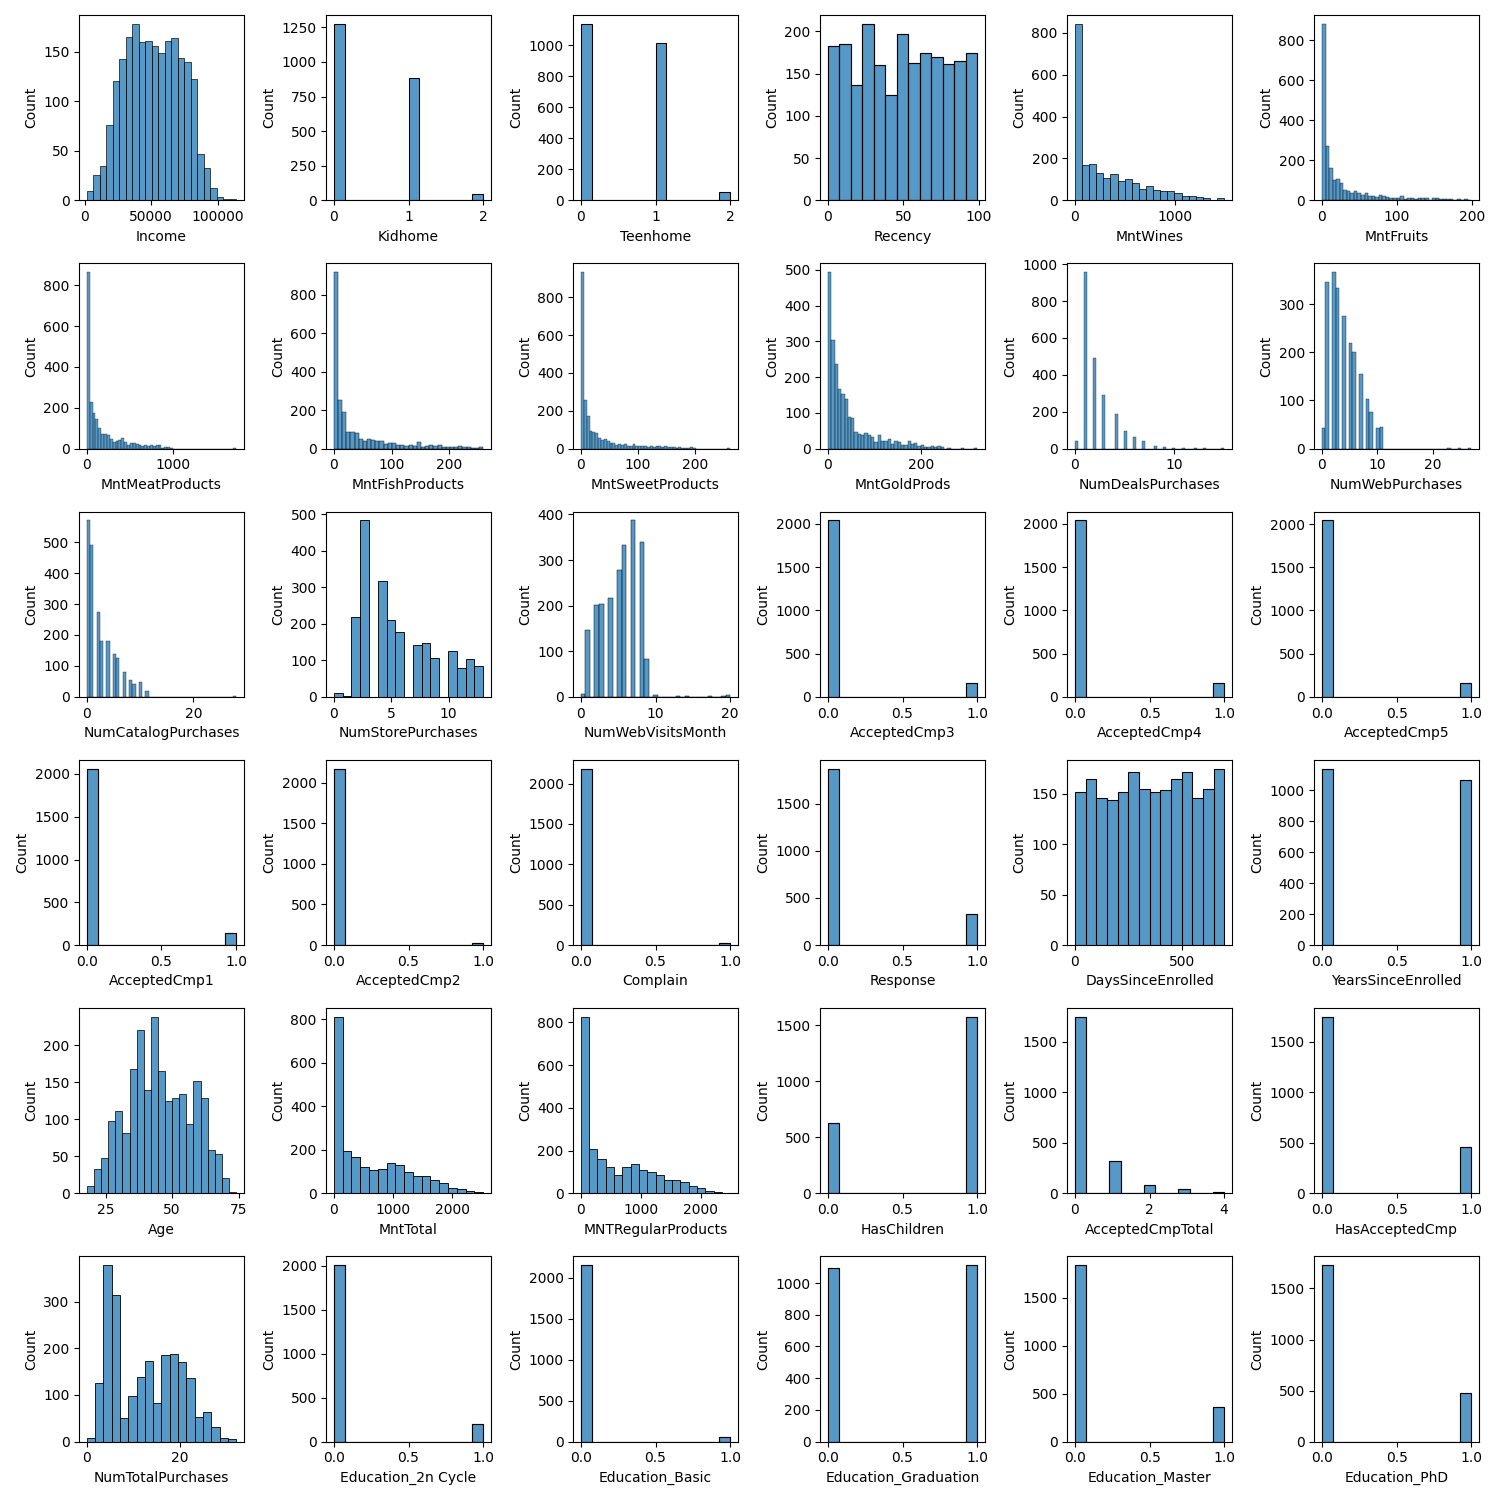

In [7]:
fig, axs = plt.subplots(nrows=6,ncols=6,figsize=(15,15),tight_layout=True)

for ax,feature in zip(axs.flatten(),Data):
    sns.histplot(x=feature,ax=ax,data=Data)

plt.show()

# Based on the graph, the columns that do not have a structure similar to a normal distribution, the Mmean Scaler is not a good option

In [9]:
axs

array([[<Axes: xlabel='Income', ylabel='Count'>,
        <Axes: xlabel='Kidhome', ylabel='Count'>,
        <Axes: xlabel='Teenhome', ylabel='Count'>,
        <Axes: xlabel='Recency', ylabel='Count'>,
        <Axes: xlabel='MntWines', ylabel='Count'>,
        <Axes: xlabel='MntFruits', ylabel='Count'>],
       [<Axes: xlabel='MntMeatProducts', ylabel='Count'>,
        <Axes: xlabel='MntFishProducts', ylabel='Count'>,
        <Axes: xlabel='MntSweetProducts', ylabel='Count'>,
        <Axes: xlabel='MntGoldProds', ylabel='Count'>,
        <Axes: xlabel='NumDealsPurchases', ylabel='Count'>,
        <Axes: xlabel='NumWebPurchases', ylabel='Count'>],
       [<Axes: xlabel='NumCatalogPurchases', ylabel='Count'>,
        <Axes: xlabel='NumStorePurchases', ylabel='Count'>,
        <Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>,
        <Axes: xlabel='AcceptedCmp3', ylabel='Count'>,
        <Axes: xlabel='AcceptedCmp4', ylabel='Count'>,
        <Axes: xlabel='AcceptedCmp5', ylabel='Count'>],

In [10]:
axs.flatten()

array([<Axes: xlabel='Income', ylabel='Count'>,
       <Axes: xlabel='Kidhome', ylabel='Count'>,
       <Axes: xlabel='Teenhome', ylabel='Count'>,
       <Axes: xlabel='Recency', ylabel='Count'>,
       <Axes: xlabel='MntWines', ylabel='Count'>,
       <Axes: xlabel='MntFruits', ylabel='Count'>,
       <Axes: xlabel='MntMeatProducts', ylabel='Count'>,
       <Axes: xlabel='MntFishProducts', ylabel='Count'>,
       <Axes: xlabel='MntSweetProducts', ylabel='Count'>,
       <Axes: xlabel='MntGoldProds', ylabel='Count'>,
       <Axes: xlabel='NumDealsPurchases', ylabel='Count'>,
       <Axes: xlabel='NumWebPurchases', ylabel='Count'>,
       <Axes: xlabel='NumCatalogPurchases', ylabel='Count'>,
       <Axes: xlabel='NumStorePurchases', ylabel='Count'>,
       <Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>,
       <Axes: xlabel='AcceptedCmp3', ylabel='Count'>,
       <Axes: xlabel='AcceptedCmp4', ylabel='Count'>,
       <Axes: xlabel='AcceptedCmp5', ylabel='Count'>,
       <Axes: xlabel

In [11]:
test = zip(axs.flatten(),Data)

In [12]:
list(test)

[(<Axes: xlabel='Income', ylabel='Count'>, 'Income'),
 (<Axes: xlabel='Kidhome', ylabel='Count'>, 'Kidhome'),
 (<Axes: xlabel='Teenhome', ylabel='Count'>, 'Teenhome'),
 (<Axes: xlabel='Recency', ylabel='Count'>, 'Recency'),
 (<Axes: xlabel='MntWines', ylabel='Count'>, 'MntWines'),
 (<Axes: xlabel='MntFruits', ylabel='Count'>, 'MntFruits'),
 (<Axes: xlabel='MntMeatProducts', ylabel='Count'>, 'MntMeatProducts'),
 (<Axes: xlabel='MntFishProducts', ylabel='Count'>, 'MntFishProducts'),
 (<Axes: xlabel='MntSweetProducts', ylabel='Count'>, 'MntSweetProducts'),
 (<Axes: xlabel='MntGoldProds', ylabel='Count'>, 'MntGoldProds'),
 (<Axes: xlabel='NumDealsPurchases', ylabel='Count'>, 'NumDealsPurchases'),
 (<Axes: xlabel='NumWebPurchases', ylabel='Count'>, 'NumWebPurchases'),
 (<Axes: xlabel='NumCatalogPurchases', ylabel='Count'>, 'NumCatalogPurchases'),
 (<Axes: xlabel='NumStorePurchases', ylabel='Count'>, 'NumStorePurchases'),
 (<Axes: xlabel='NumWebVisitsMonth', ylabel='Count'>, 'NumWebVisitsMon

- https://scikit-learn.org/stable/modules/preprocessing.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html

In [14]:
# Definição das colunas
one_hot_cols = [
    "HasChildren",
    "HasAcceptedCmp",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Complain",
    "Response",
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "AcceptedCmpTotal",
]



standard_cols = [
    "Income",
    "Age"
]

power_cols = [col for col in Data.columns if col.startswith('Mnt') or col.startswith('Num')]

minmax_cols = [col for col in Data.columns if col not in one_hot_cols + standard_cols + power_cols]

# Criando o ColumnTransformer
preprocessing = ColumnTransformer(
    transformers=[
        ('OneHot', OneHotEncoder(drop='first'), one_hot_cols),
        ('Standard_process', StandardScaler(), standard_cols),
        ('min_max', MinMaxScaler(), minmax_cols),
        ('power_process', PowerTransformer(), power_cols)
    ]
)

# Aplicando o pré-processamento
Data_transformed = preprocessing.fit_transform(Data)

# Obtendo os nomes das colunas transformadas
feature_names = preprocessing.get_feature_names_out()

# Criando o DataFrame resultante
Data_scaled = pd.DataFrame(Data_transformed, columns=feature_names)

display(Data_scaled.head())

OneHot__HasChildren_1  OneHot__HasAcceptedCmp_1  OneHot__AcceptedCmp1_1  \
0                    0.0                       0.0                     0.0   
1                    1.0                       0.0                     0.0   
2                    0.0                       0.0                     0.0   
3                    1.0                       0.0                     0.0   
4                    1.0                       0.0                     0.0   

   OneHot__AcceptedCmp2_1  OneHot__AcceptedCmp3_1  OneHot__AcceptedCmp4_1  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   OneHot__AcceptedCmp5_1  OneHot__Complain_1  OneHot__Response_1  \
0                     0.0                 0.0                 1.0   
1                     0.0                 0.0                 0.0   
2                     0.0                 0.0                 0.0   
3                     0.0                 0.0                 0.0   
4                     0.0                 0.0                 0.0   

   OneHot__Kidhome_1  ...  power_process__MntFishProducts  \
0                0.0  ...                        1.601839   
1                1.0  ...                       -0.875531   
2                0.0  ...                        1.326078   
3                1.0  ...                       -0.104305   
4                1.0  ...                        0.782743   

   power_process__MntSweetProducts  power_process__MntGoldProds  \
0                         1.387173                     1.089046   
1                        -0.976308                    -0.947497   
2                         0.546813                     0.442997   
3                        -0.525155                    -1.052464   
4                         0.694250                    -0.350932   

   power_process__NumDealsPurchases  power_process__NumWebPurchases  \
0                          0.753752                        1.332973   
1                          0.160834                       -1.382228   
2                         -0.838557                        1.332973   
3                          0.160834                       -0.726457   
4                          1.453779                        0.521339   

   power_process__NumCatalogPurchases  power_process__NumStorePurchases  \
0                            1.747828                         -0.425453   
1                           -0.384719                         -1.473644   
2                            0.150188                          1.239811   
3                           -1.341911                         -0.425453   
4                            0.518935                          0.278071   

   power_process__NumWebVisitsMonth  power_process__MntTotal  \
0                          0.700269                 1.315543   
1                         -0.108417                -1.447153   
2                         -0.527390                 0.658507   
3                          0.300240                -1.123214   
4                         -0.108417                 0.175065   

   power_process__NumTotalPurchases  
0                          1.221174  
1                         -1.319438  
2                          1.025388  
3                         -0.877589  
4                          0.356875  

[5 rows x 47 columns]

In [15]:
power_cols

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'MntTotal',
 'NumTotalPurchases']

In [16]:
minmax_cols

['Recency',
 'DaysSinceEnrolled',
 'MNTRegularProducts',
 'Education_2n Cycle',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Has_Partner',
 'Marital_Status_Single',
 'Age_Group_18-30',
 'Age_Group_31-45',
 'Age_Group_46-60',
 'Age_Group_61-121']

In [17]:
Data_scaled_no_onehot_encoder = Data_scaled.columns[~Data_scaled.columns.str.startswith('One')] #o tio e a negacao pro pandas

In [18]:
len(Data_scaled_no_onehot_encoder)

29

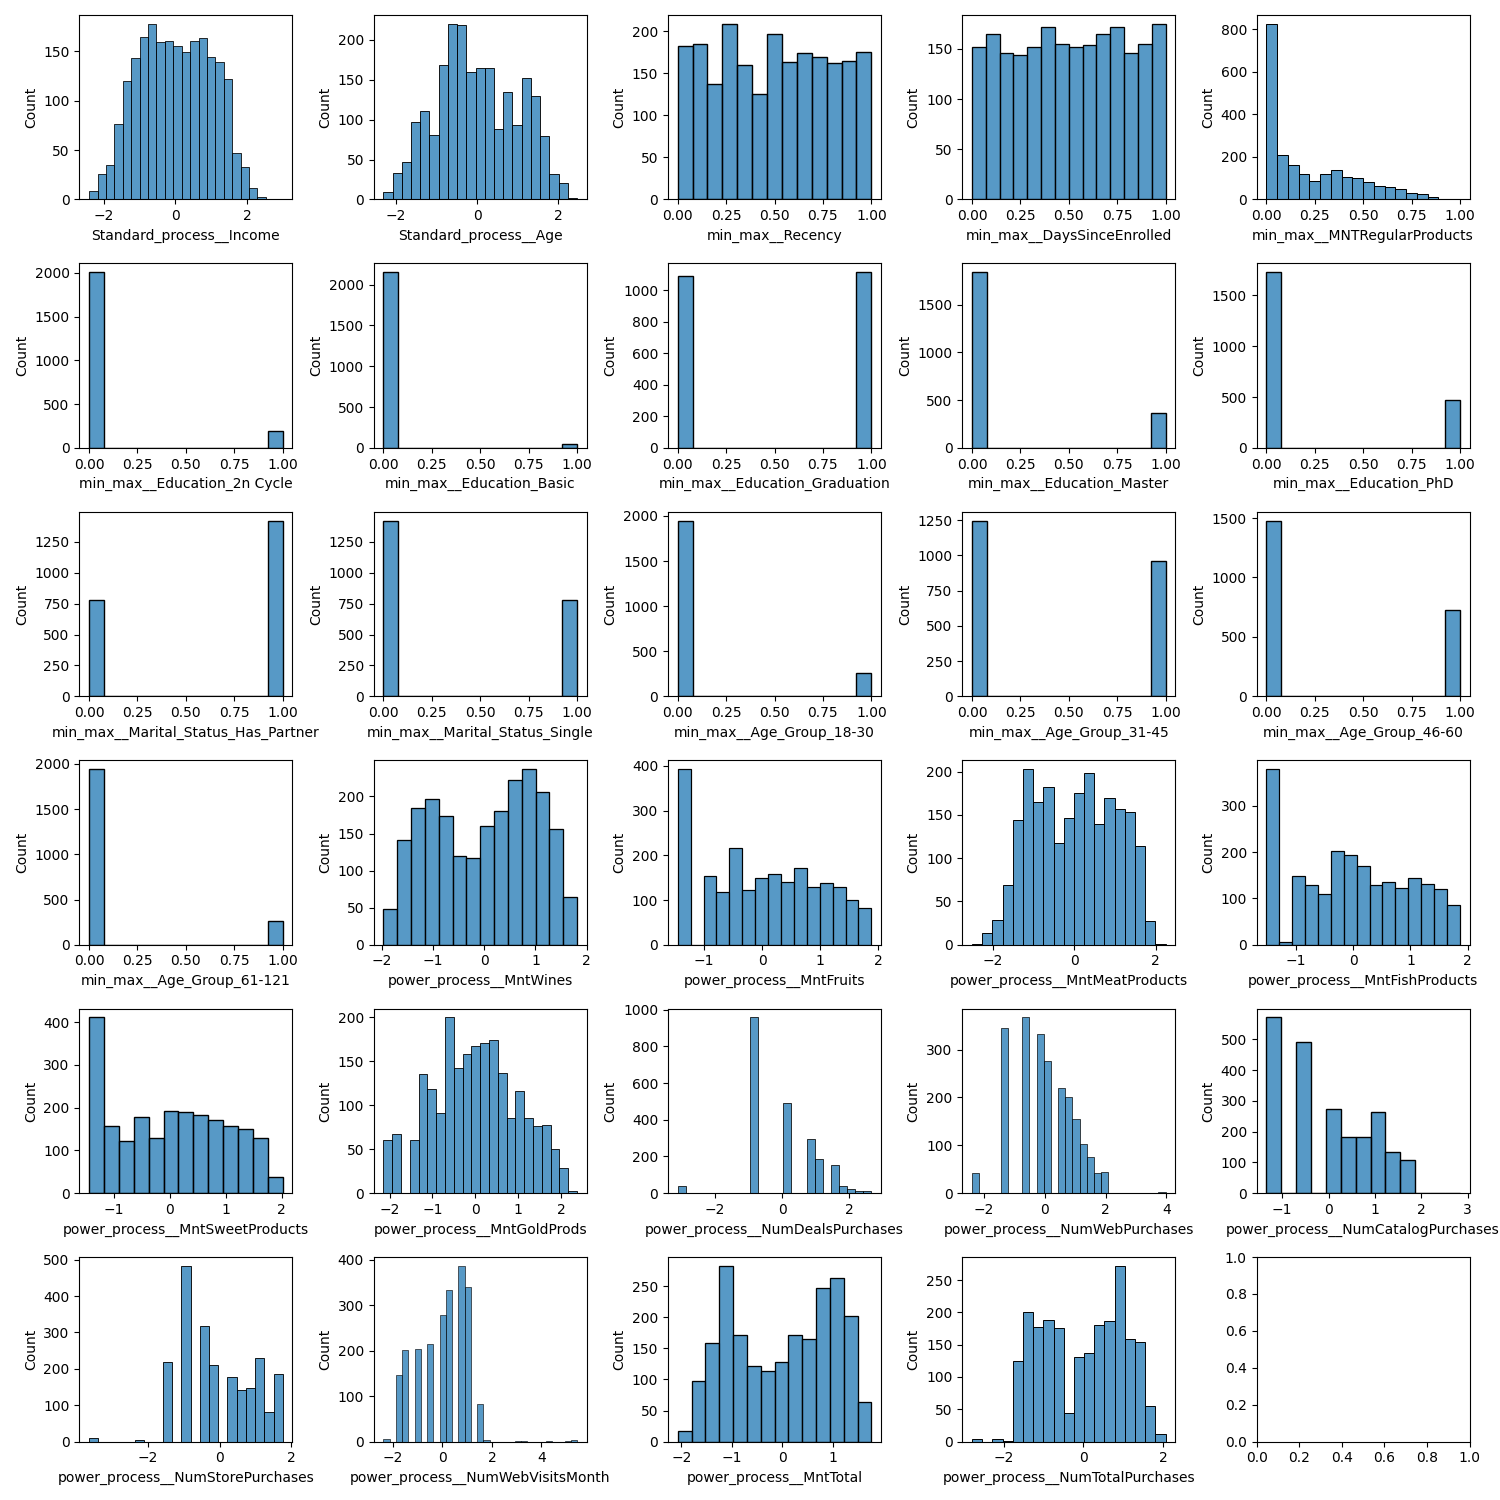

In [19]:
fig, axs = plt.subplots(nrows=6,ncols=5,figsize=(15,15),tight_layout=True)

for ax,feature in zip(axs.flatten(),Data_scaled_no_onehot_encoder):
    sns.histplot(x=feature,ax=ax,data=Data_scaled)

plt.show()

# As the algorithm uses distance between points, since they are all almost on the same scale, this may be better for the model.

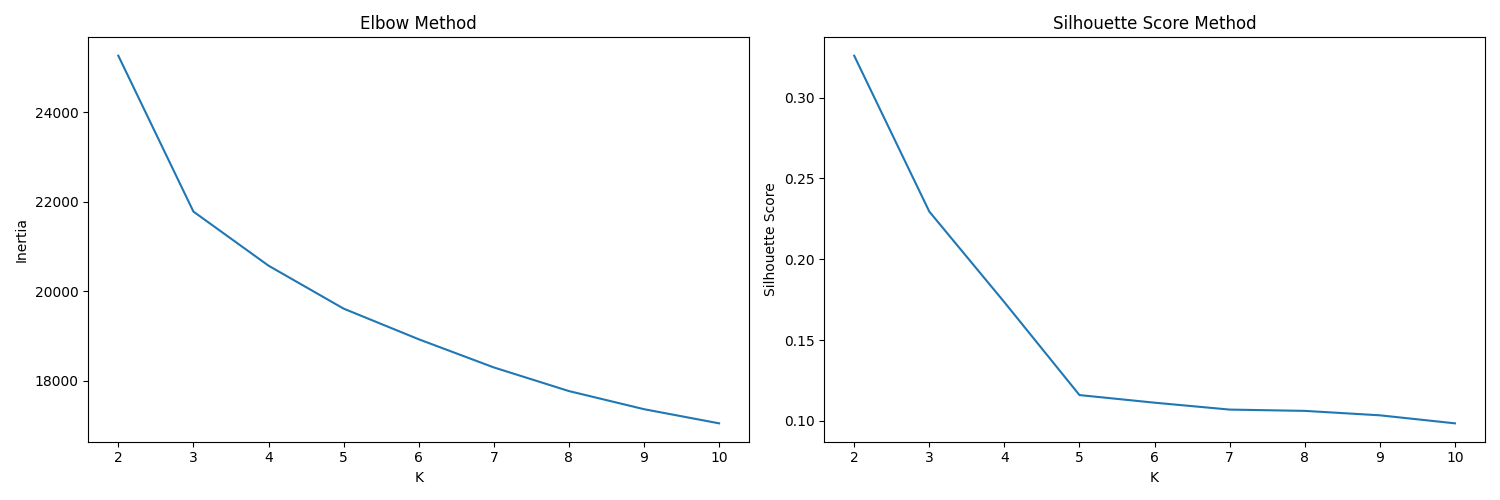

In [21]:
elbow_silhouette_graphic(Data_scaled)

In [22]:
pipeline = Pipeline(
    [
        ('preprossesing',preprocessing),
        ('pca',PCA(n_components=3,random_state=42,)),
        ('clustering',KMeans(n_clusters=3,random_state=42,n_init=10)),
        
    ]
    
)

pipeline.fit(Data)

Pipeline(steps=[('preprossesing',
                 ColumnTransformer(transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Response', 'Kidhome',
                                                   'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'AcceptedCmpTotal']),
                                                 ('Standard_process',
                                                  StandardScaler(),
                                                  ['Income', 'Age']),...
                                                  PowerTransformer(),
                                                  ['MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'NumTotalPurchases'])])),
                ('pca', PCA(n_components=3, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=3, n_init=10, random_state=42))])

# Principal Component Analysis (PCA) is a technique used for reducing the dimensionality of data while preserving as much variability as possible. It starts by centering the data around zero and then calculates the covariance matrix to understand the relationships between variables. By finding the eigenvalues and eigenvectors of this matrix, PCA identifies the principal components that capture the most variance. The data is then projected onto a lower-dimensional space defined by these principal components. This reduction in dimensionality simplifies the data, making it easier to visualize and interpret, while also improving the performance of machine learning algorithms by reducing training time and avoiding overfitting. PCA can also help in compressing data, saving storage space, and making algorithms more efficient.

In [24]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2'], dtype=object)

In [25]:
pipeline.named_steps

{'preprossesing': ColumnTransformer(transformers=[('OneHot', OneHotEncoder(drop='first'),
                                  ['HasChildren', 'HasAcceptedCmp',
                                   'AcceptedCmp1', 'AcceptedCmp2',
                                   'AcceptedCmp3', 'AcceptedCmp4',
                                   'AcceptedCmp5', 'Complain', 'Response',
                                   'Kidhome', 'Teenhome', 'YearsSinceEnrolled',
                                   'AcceptedCmpTotal']),
                                 ('Standard_process', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('min_max', MinMaxScaler(),
                                  ['Recen...
                                   'Marital_Status_Single', 'Age_Group_18-30',
                                   'Age_Group_31-45', 'Age_Group_46-60',
                                   'Age_Group_61-121']),
                                 ('power_process', Powe

In [26]:
pipeline['clustering'].labels_

array([0, 1, 0, ..., 0, 0, 2])

In [27]:
Original_Data = pd.read_csv('./DATA/customers_IFood.csv') ### ORIGINAL DATA!

In [28]:
DataClustered = Original_Data.copy() 

In [29]:
DataClustered['Cluster'] = pipeline['clustering'].labels_

In [30]:
DataClustered.to_csv('./DATA/Data_Customers_Clustered.csv',index=False)

In [31]:
DataClustered.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation    Has_Partner  71613.0        0         0       26       426   
3  Graduation    Has_Partner  26646.0        1         0       26        11   
4         PhD    Has_Partner  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  YearsSinceEnrolled  Age  \
0         88              546              172  ...                   1   57   
1          1                6                2  ...                   0   60   
2         49              127              111  ...                   0   49   
3          4               20               10  ...                   0   30   
4         43              118               46  ...                   0   33   

   Age_Group  MntTotal  MNTRegularProducts  HasChildren  AcceptedCmpTotal  \
0      46-60      1617                1529            0                 0   
1      46-60        27                  21            1                 0   
2      46-60       776                 734            0                 0   
3      18-30        53                  48            1                 0   
4      31-45       422                 407            1                 0   

   HasAcceptedCmp  NumTotalPurchases  Cluster  
0               0                 22        0  
1               0                  4        1  
2               0                 20        0  
3               0                  6        1  
4               0                 14        2  

[5 rows x 35 columns]

In [32]:
DataClustered['Cluster'].value_counts()

Cluster
1    875
0    681
2    649
Name: count, dtype: int64

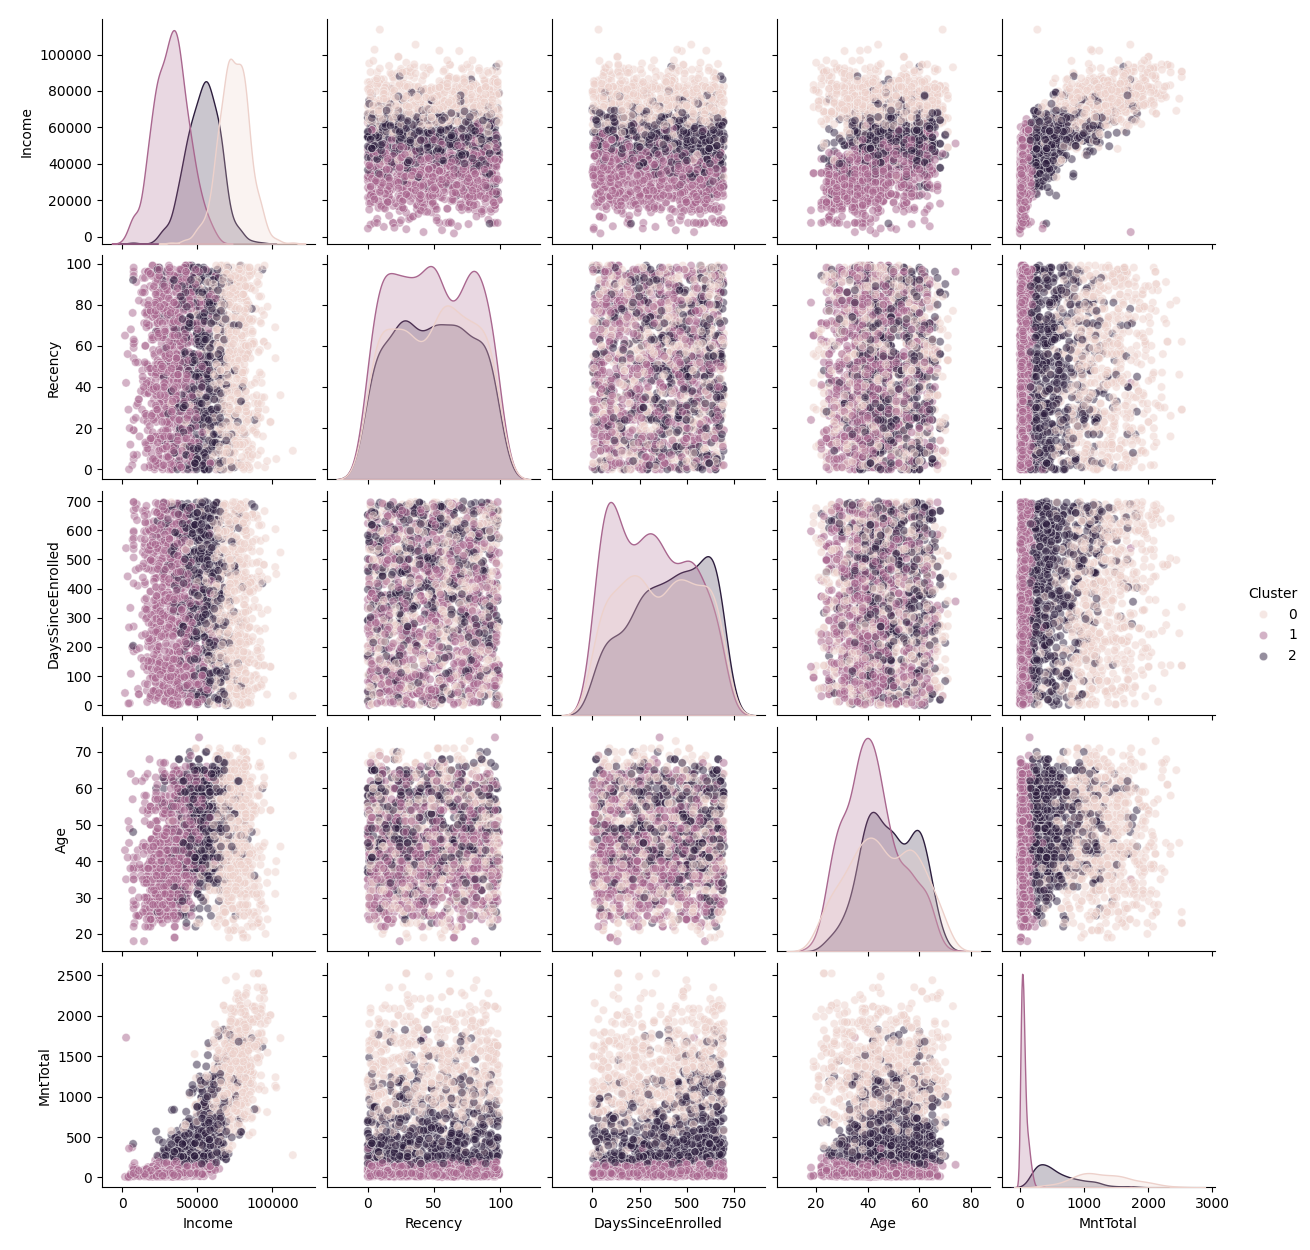

In [33]:
colums_analysis = [
    'Income',
    'Recency',
    'DaysSinceEnrolled',
    'Age',
    'MntTotal',
]

pairplot(DataClustered,colums_analysis,'kde','Cluster')

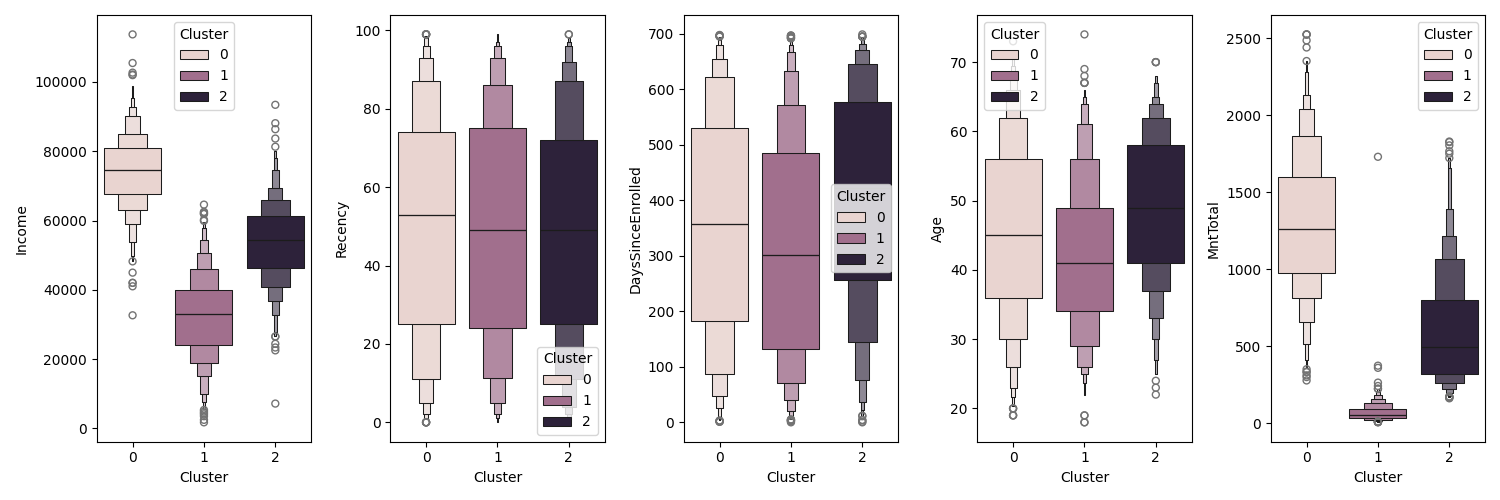

In [34]:
fig, axs = plt.subplots(nrows=1,ncols=5,figsize=(15,5),tight_layout=True)

for ax,col in zip(axs ,colums_analysis):
    sns.boxenplot(x='Cluster', y=col ,data=DataClustered,ax=ax,hue=DataClustered['Cluster'])
    
    
plt.show()#showmeans=True)

In [35]:
print(len(colums_analysis))

5


In [36]:
data_to_pie = DataClustered.groupby('Cluster')[col].sum()

In [37]:
data_to_pie.index

Index([0, 1, 2], dtype='int32', name='Cluster')

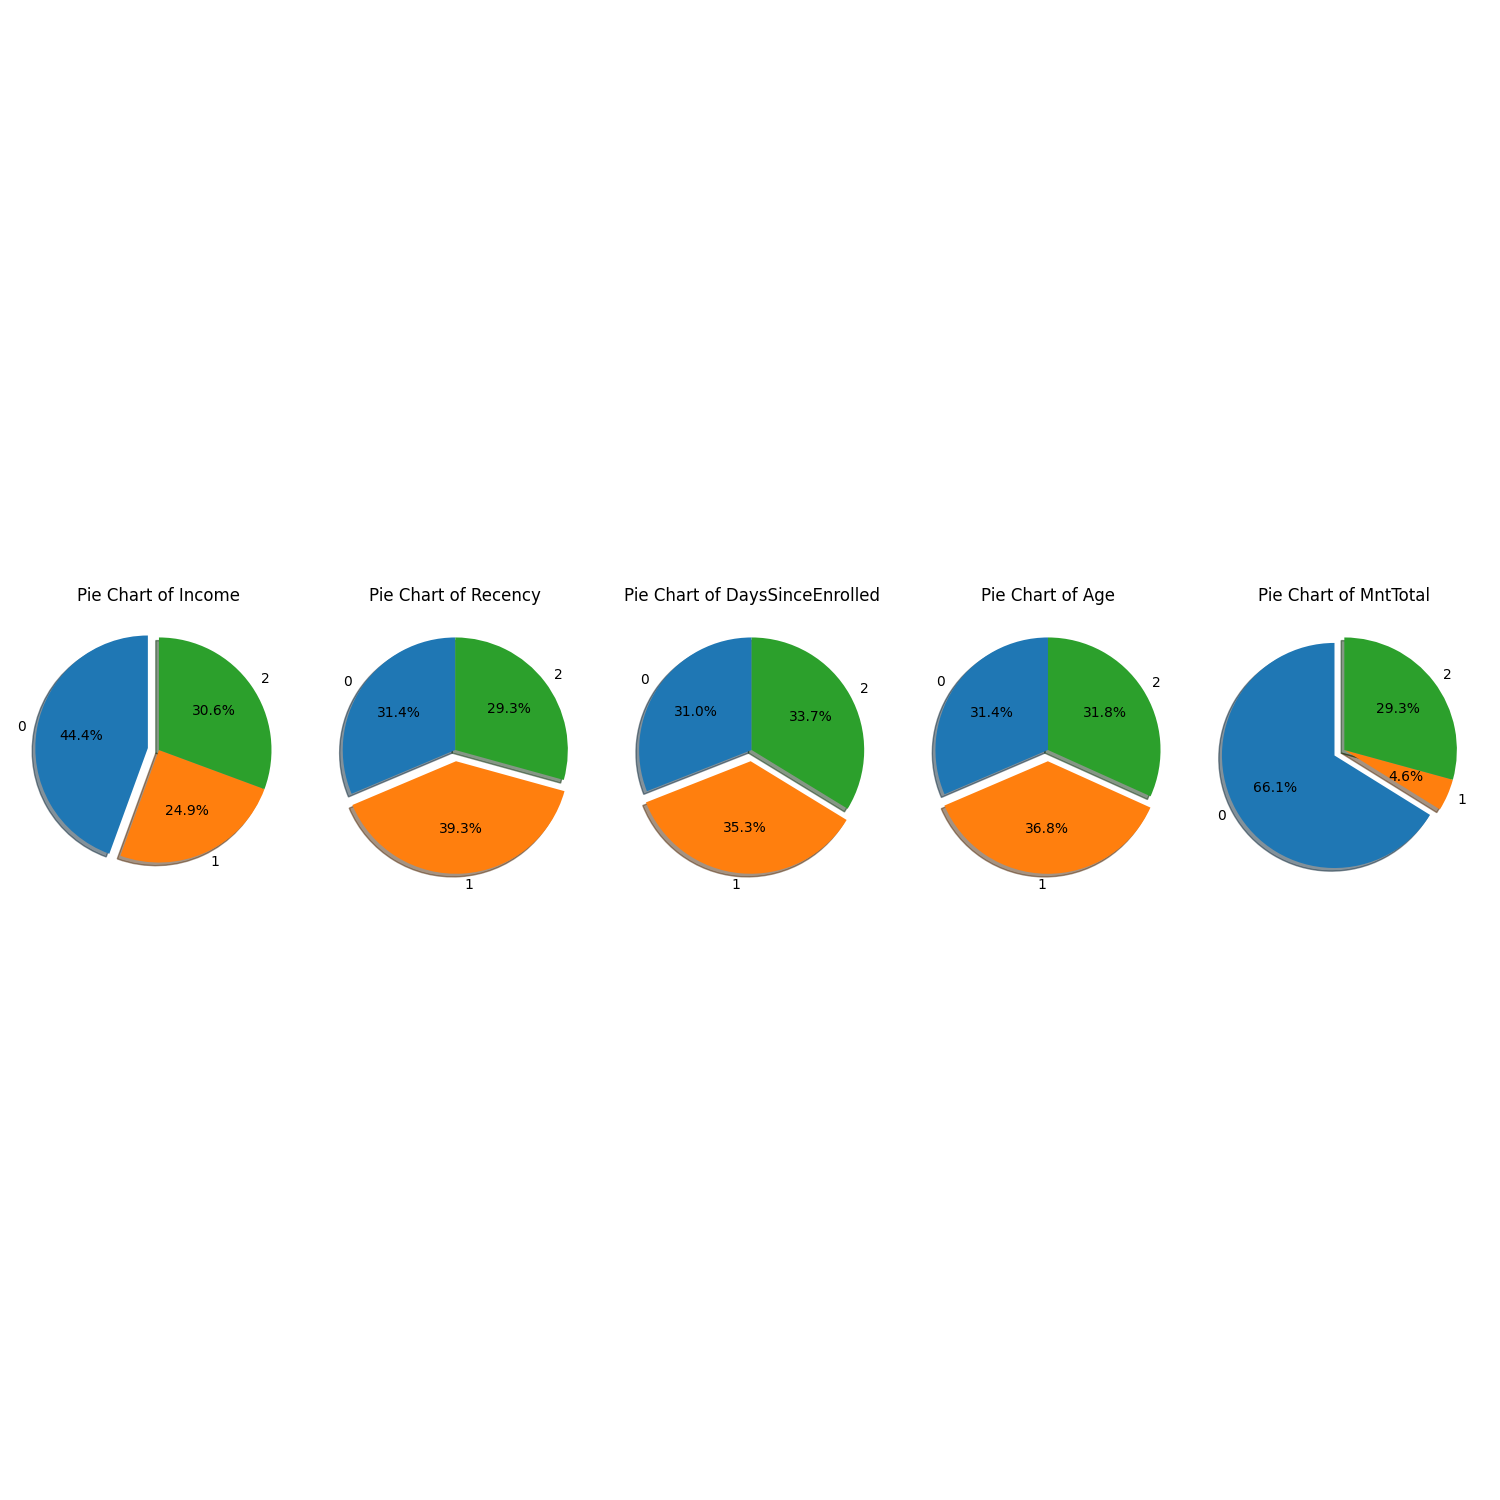

In [38]:
fig, axs = plt.subplots(nrows=1, ncols=len(colums_analysis), figsize=(15, 15), tight_layout=True)

for ax, col in zip(axs.flatten(), colums_analysis):
    data_to_pie = DataClustered.groupby('Cluster')[col].sum()
    percentage = data_to_pie / data_to_pie.sum() * 100
    cluster_with_most_percentage = percentage.idxmax()
    explode = [0.1 if cluster == cluster_with_most_percentage else 0 for cluster in data_to_pie.index]
    ax.pie(data_to_pie, labels=data_to_pie.index, autopct='%1.1f%%', explode=explode, shadow=True, startangle=90)
    ax.set_title(f'Pie Chart of {col}')

plt.show()


In [39]:
columns = [
    'HasChildren',
    'Marital_Status',
    'Education',
    'HasAcceptedCmp',
    'Response',
    'YearsSinceEnrolled',   
]

cluster_diff_cols = ['MntTotal', 'Income']

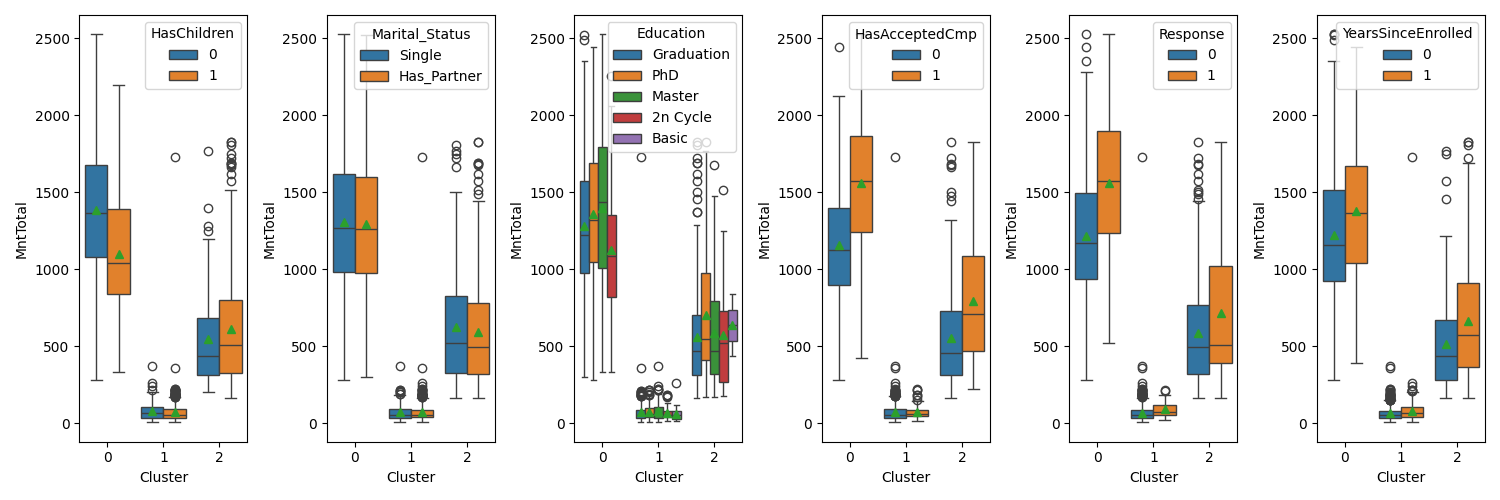

In [40]:
fig, axs = plt.subplots(nrows=1, ncols=len(columns), figsize=(15,5), tight_layout=True)
for ax, col in zip(axs.flatten(), columns):
    sns.boxplot(x='Cluster', y=cluster_diff_cols[0], data=DataClustered, ax=ax, showmeans=True, hue=col)
plt.show()

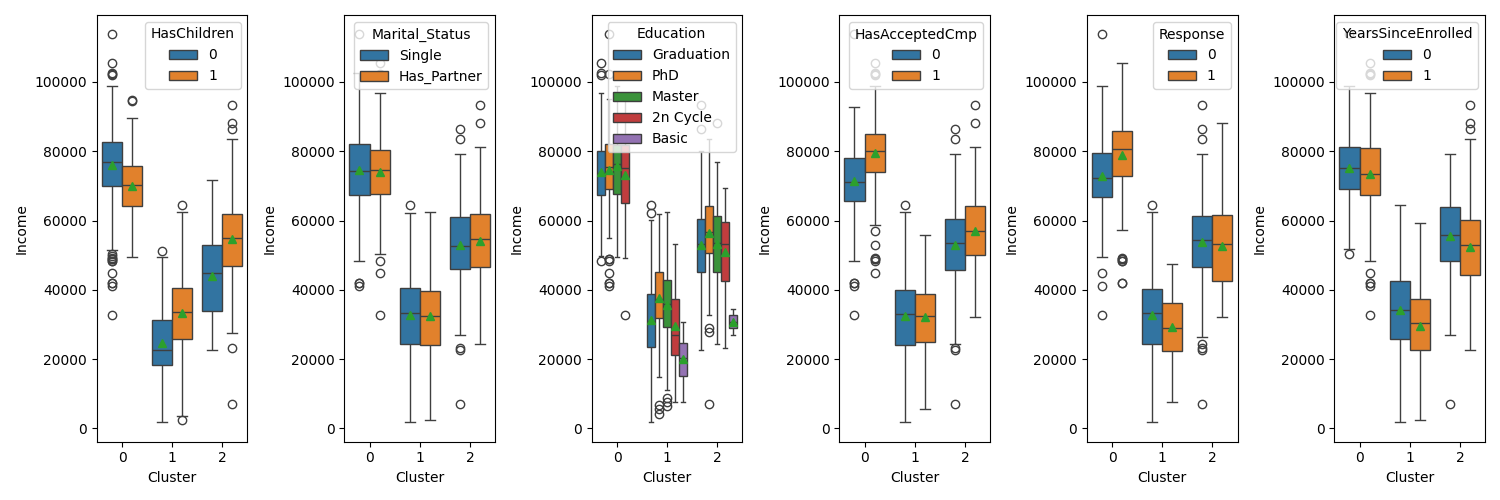

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=len(columns), figsize=(15,5), tight_layout=True)
for ax, col in zip(axs, columns):
    sns.boxplot(x='Cluster', y=cluster_diff_cols[1], data=DataClustered, ax=ax, showmeans=True, hue=col)
plt.show()

In [42]:
DataClustered['Cluster'].nunique()

3

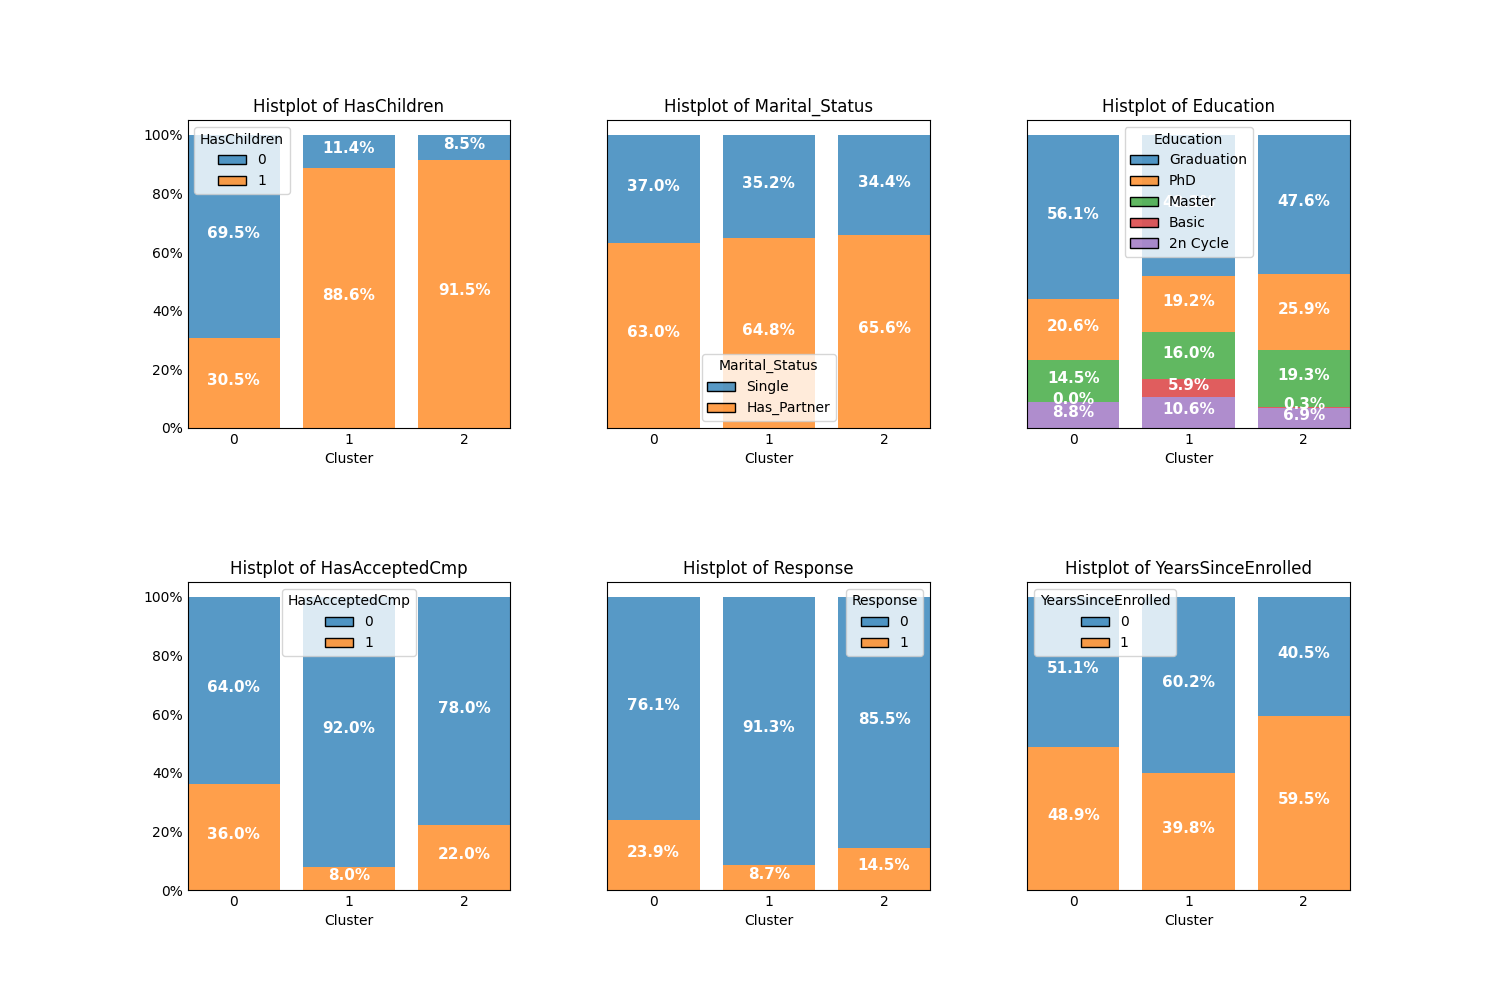

In [43]:
plot_columns_percent_by_cluster(DataClustered, columns, (2, 3), figsize=(15, 10), column_cluster='Cluster')

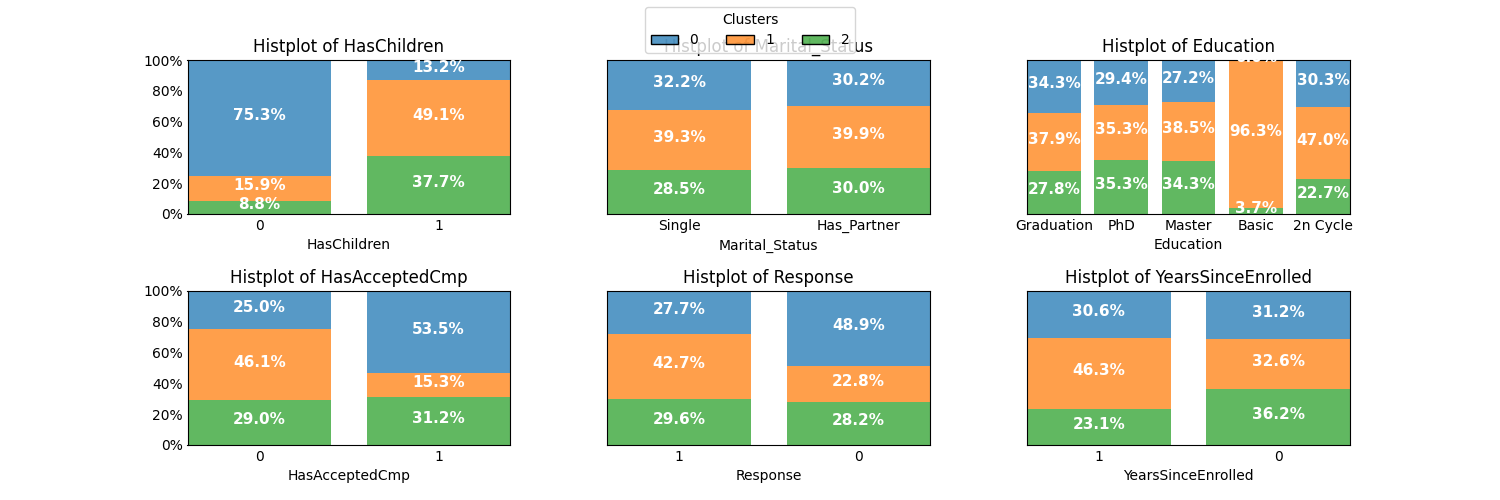

In [44]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 5), sharey=True)
for ax, col in zip(axs.flatten(), columns):
    h = sns.histplot(x=col, data=DataClustered, ax=ax, hue='Cluster', multiple='fill', stat='percent', discrete=True, shrink=0.8, palette='tab10')
    ax.set_title(f'Histplot of {col}')
    if pd.api.types.is_numeric_dtype(DataClustered[col]):
        ax.set_xticks(range(len(DataClustered[col].unique())))
        ax.set_xticklabels(DataClustered[col].unique())
    ax.set_yticklabels('')
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.set_ylabel('')
    ax.tick_params(axis='both', which='both', length=0)
    for bars in h.containers:
        h.bar_label(bars, label_type='center', labels=[f'{b.get_height():.1%}' for b in bars], color='white', weight='bold', fontsize=11, padding=2)
    for bar in h.patches:
        bar.set_linewidth(0)
    legend = h.get_legend()
    legend.remove()
labels =[text.get_text() for text in legend.get_texts()]
fig.legend(handles=legend.legend_handles, labels=labels,loc='upper center',ncols=DataClustered['Cluster'].nunique(),title='Clusters')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [45]:
[text.get_text() for text in legend.get_texts()]

['0', '1', '2']

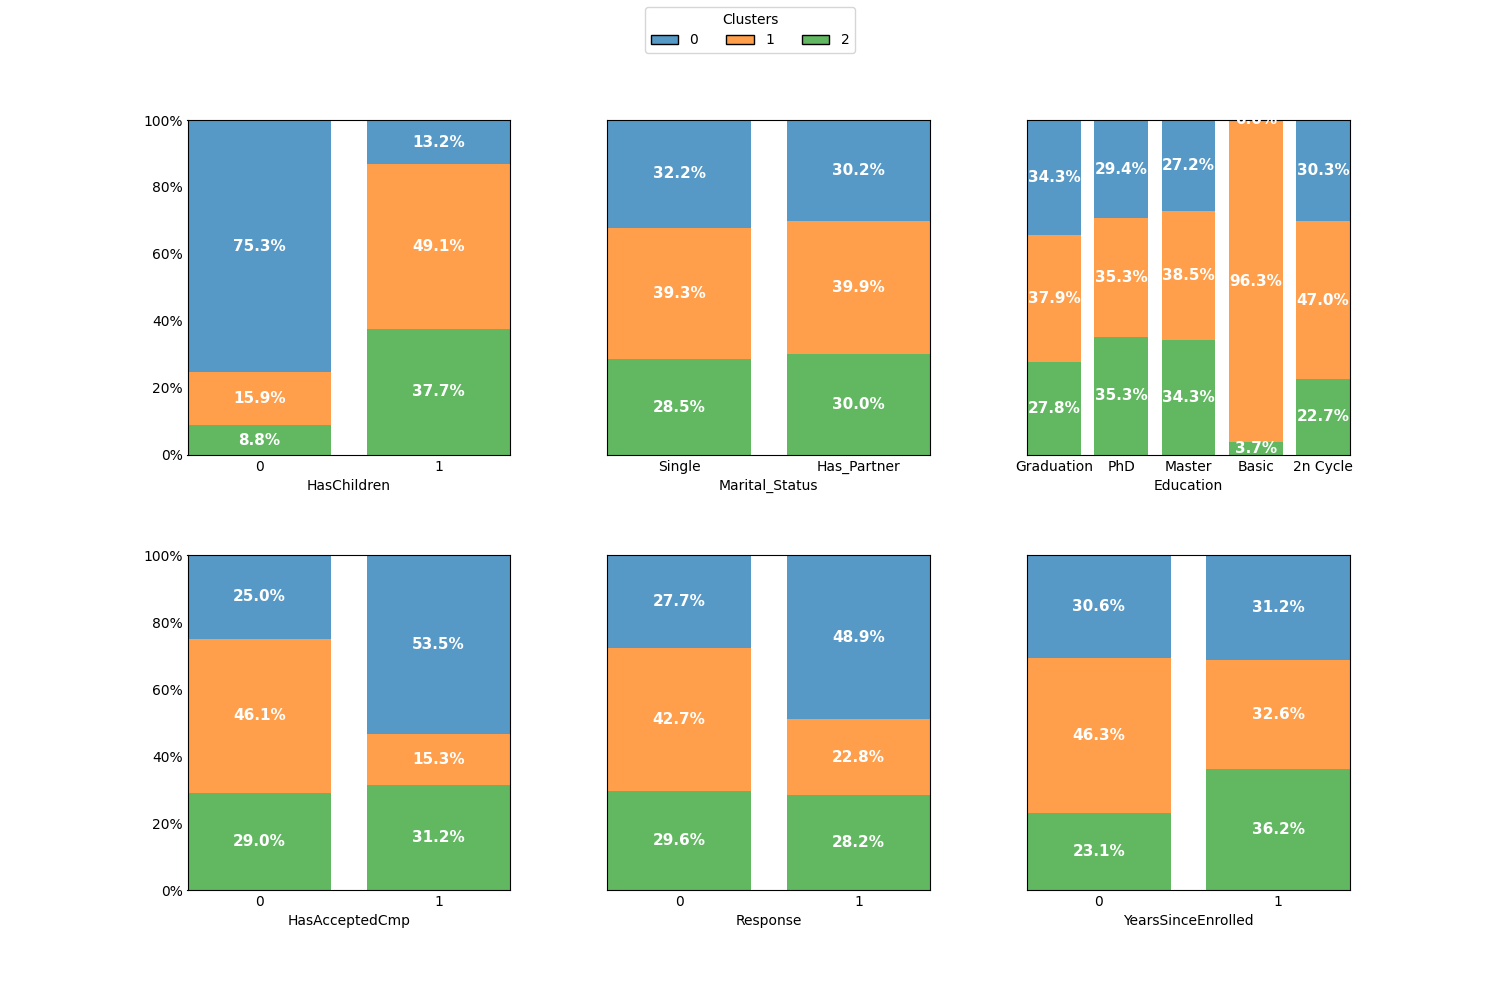

In [46]:
plot_columns_percent_hue_cluster(DataClustered, columns,(2,3), figsize=(15,10), column_cluster='Cluster')

Cluster analysis:

Cluster 0:

 - High income
 - High spending
 - Very likely to have no children
 - More likely to accept campaigns
 - No individuals with basic education
 - No standout age profile
 
 
Cluster 1:

 - Low income
 - Low spending
 - Likely to have children
 - Low propensity to accept campaigns
 - The only cluster with a significant percentage of individuals with basic education
 - Younger individuals
 
 
Cluster 2:

 - Intermediate income
 - Intermediate spending
 - Likely to have children
 - May accept campaigns
Older individuals

In [48]:
centroids = pipeline['clustering'].cluster_centers_

In [49]:
Data_pca = pd.DataFrame(pipeline[:-1].fit_transform(Data),
                        columns=pipeline[:-1].get_feature_names_out())
Data_pca.head()

pca0      pca1      pca2
0  3.805561  0.945474 -0.781379
1 -3.539726 -0.097935  1.758635
2  2.937598 -0.544784  0.280268
3 -3.023859 -0.785904 -1.115277
4  1.098838  0.293126 -1.496759

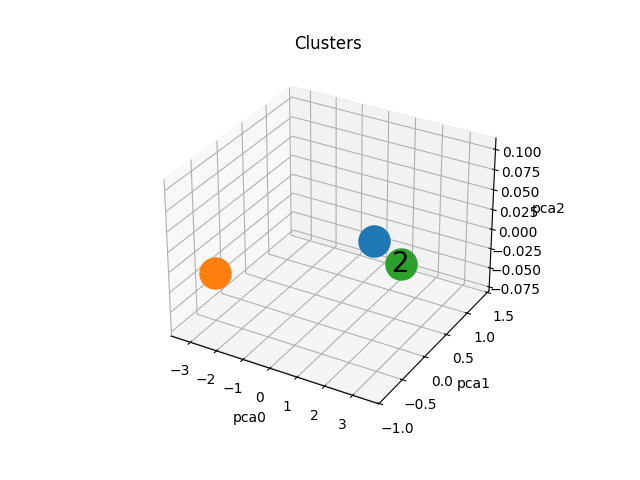

In [50]:
view_clusters(Data_pca,Data_pca.columns,4,centroids)  #mostrar_pontos=True  mostrar_centroids=True,

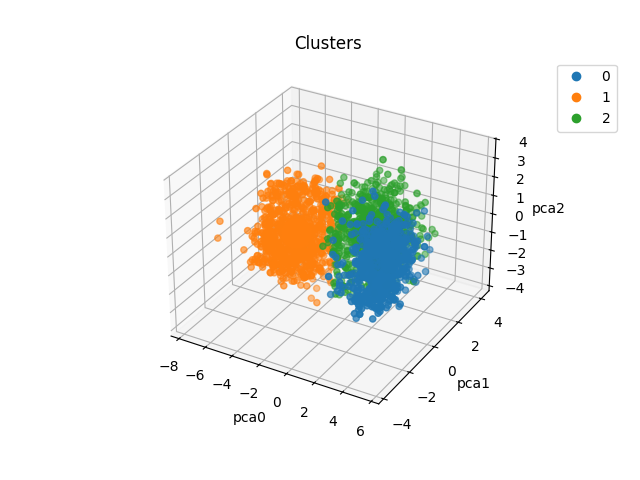

In [51]:
view_clusters(Data_pca,Data_pca.columns,3,centroids,mostrar_centroids=True,mostrar_pontos=True,coluna_clusters=DataClustered['Cluster'])

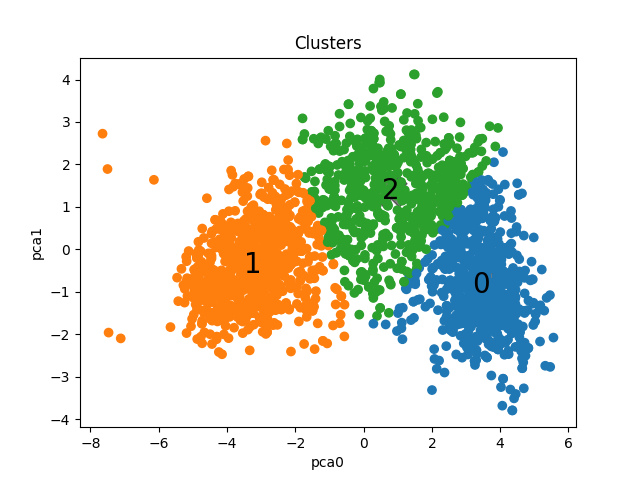

In [52]:
plot_clusters_2D(Data_pca,Data_pca.columns,3,centroids,show_centroids=True,
                 show_points=True,column_clusters=DataClustered['Cluster'])
